In [1]:
from script.model_localization import pyramid, sliding_window, iou_bbox, non_maximum_supperssion, visualize_bbox
from script.model_classification import SVMObjectClassifier
from sklearn.model_selection import train_test_split
from script.feature_source import FeatureExtracter
from script.training import training_model
from script.slider import Slider
import numpy as np
import argparse
import time
import cv2
import os

# HOG

In [ ]:
from script.dataset import load_traffic_signboard_dataset
from script.feature_source import FeatureExtracter
from script.helpers import show_images
sourcer_params = {             # hls, hsv, yuv, ycrcb 
  'spatial_size': (32, 32),            # (16, 16), (32, 32), (64, 64)
  'orientations': 9,        # 6 - 12
  'pixels_per_cell': 8,               # 8, 16
  'cells_per_block': 2,                # 1, 2
  'transform_sqrt': True,
  'block_norm': 'L2',
  'hog_visualize': True
}
sourcer = FeatureExtracter(**sourcer_params)
images, labels = load_traffic_signboard_dataset()

In [ ]:
image_show = []
i_start, i_end = 970, 1000
for i in range(i_start, i_end):
    start_frame = images[i]
    features = sourcer.features(start_frame)
    feature_shape = features.shape
    rgb_img, hog_image = sourcer.visualize()
    image_show.append(rgb_img)
    image_show.append(hog_image)
print('Feature Shape:', feature_shape)
show_images(image_show, per_row = i_end-i_start, per_col = 2, W = 25, H = 5)

# Loading Model

In [2]:
sourcer_params = {             
  'spatial_size': (32, 32), # (16, 16), (32, 32), (64, 64)
  'orientations': 9,        # 6 - 12
  'pixels_per_cell': 8,     # 8, 16
  'cells_per_block': 2,     # 1, 2
  'transform_sqrt': True,
  'block_norm': 'L2',
  'hog_visualize': False
}
exist_path = './save_model/model.pkl'
save_path = './save_model'
feature_extracter = FeatureExtracter(**sourcer_params)

In [3]:
model = SVMObjectClassifier(C=0.5)
model.set_feature_extracter(feature_extracter)
if os.path.exists(save_path + '/model.pkl'):
    print('Loading model...')
    model.load(save_path)

Loading model...


# Detection

In [4]:
image_path_lst = [os.path.join('./demo', filename) for filename in os.listdir('./demo')]

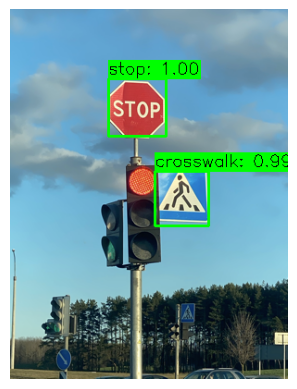

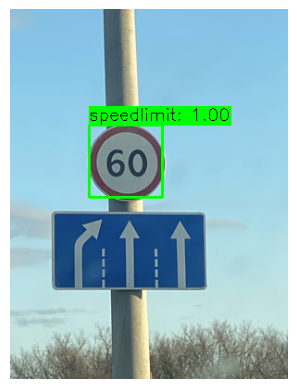

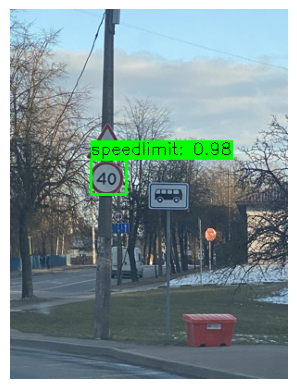

In [5]:
for image_path in image_path_lst:
    windowSize = [(30, 30), (50, 50), (80, 80)]
    image = cv2.imread(image_path)
    predict_bbox = []
    for window_size in windowSize:
        slider = Slider(model, window_size, 5, scale=1.25, visualize=False)
        predict_bbox += slider.predict(image, 0.95)
    predict_bbox = non_maximum_supperssion(predict_bbox, 0.2)
    visualize_bbox(image, predict_bbox)